The following is a simple backtest of a betting strategy based on the Kelly criteron. I'll try to compare different ratios of the criterion and see which has the best returns.

This experiment is inspired by the following [paper](http://www.edwardothorp.com/wp-content/uploads/2016/11/KellySimulationsNew.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('epl_odds.csv')

In [3]:
print(max(df['AvgH']))
print(max(df['AvgA']))
print(max(df['AvgD']))

14.65
25.64
10.58


The columns we need are:
- FTR - Full time result (either **H**ome or **A**way)
- AvgH - average odds for the home team to win
- AvgA - average odds for the away team to win
- AvgD - average odds for a draw

In [4]:
o_cols = ['FTR', 'AvgH', 'AvgA', 'AvgD']
df = df.filter(o_cols)

Assume we start with a balance of $100.

The strategy is to pick the outcome with the highest probability (lowest odds) and place Kelly bets on the outcome.

In [22]:
starting_bal = 100
k_factor = 1
bal = starting_bal
bet = 0

bal_history = np.empty(len(df))

outcomes = ['H', 'A', 'D']
for i, row in df.iterrows():
    all_odds = row.drop('FTR')
    min_idx = np.argmin(all_odds) + 1
    
    odds = row[min_idx]
    
    p = 1/odds
    
    bet = (p + (p-1)/odds)*k_factor
    
    bet_amt = bet*bal
    bal -= bet_amt
    if row['FTR'] == outcomes[min_idx-1]:
        bal += bet_amt*odds
        #print(f"Won with balance ${bal:.2f}, odds {odds}, Kelly {bet:.2f}")
    #else:
        #print(f"Lost with balance ${bal:.2f}")
        
    
    bal_history[i] = bal
        
    if bal <= 0:
        break

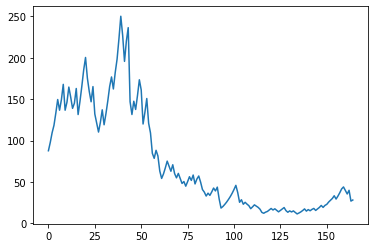

Final balance of $28.30


In [21]:
plt.plot(bal_history)
plt.show()

print(f"Final balance of ${bal:.2f}")